# 7.01 Lesson 1 key concepts
## Reading the data

In [299]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)


In [300]:
data = pd.read_csv('learningSet.csv')

/var/folders/b8/vmq4cjgs7j9_w0q786_gzn500000gn/T/ipykernel_40732/3673836359.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('learningSet.csv')


In [301]:
print(data.shape)
data.head()

(95412, 481)


ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0     8901     GRI      0    IL  61081                    3712      0   
1     9401     BOA      1    CA  91326                    5202      0   
2     9001     AMH      1    NC  27017                       0      0   
3     8701     BRY      0    CA  95953                    2801      0   
4     8601              0    FL  33176                    2001      0   

  RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN CLUSTER   AGE AGEFLAG  \
0                                   XXXX     T2      36  60.0           
1                                   XXXX     S1      14  46.0       E   
2                                   XXXX     R2      43   NaN           
3                                   XXXX     R2      44  70.0       E   
4        X     X                    XXXX     S2      16  78.0       E   

  HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  NUMCHLD  INCOME GENDER  WEALTH1  \
0                                               NaN     NaN      F      NaN   
1        H                               M      1.0     6.0      M      9.0   
2        U                                      NaN     3.0      M      1.0   
3        U                                      NaN     1.0      F      4.0   
4        H                                      1.0     3.0      F      2.0   

   HIT  MBCRAFT  MBGARDEN  MBBOOKS  MBCOLECT  MAGFAML  MAGFEM  MAGMALE  \
0    0      NaN       NaN      NaN       NaN      NaN     NaN      NaN   
1   16      0.0       0.0      3.0       1.0      1.0     1.0      0.0   
2    2      0.0       0.0      1.0       0.0      0.0     0.0      0.0   
3    2      0.0       0.0      0.0       0.0      0.0     0.0      0.0   
4   60      1.0       0.0      9.0       0.0      4.0     1.0      0.0   

   PUBGARDN  PUBCULIN  PUBHLTH  PUBDOITY  PUBNEWFN  PUBPHOTO  PUBOPP DATASRCE  \
0       NaN       NaN      NaN       NaN       NaN       NaN     NaN            
1       0.0       0.0      2.0       0.0       3.0       0.0     0.0        3   
2       0.0       0.0      1.0       0.0       0.0       0.0     0.0        3   
3       0.0       0.0      0.0       0.0       0.0       0.0     1.0        3   
4       0.0       0.0      4.0       0.0       1.0       0.0     1.0        3   

   MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV SOLP3  \
0         0       39        34        18        10         2       1         
1         0       15        55        11         6         2       1         
2         0       20        29        33         6         8       1         
3         0       23        14        31         3         0       3         
4         1       28         9        53        26         3       2         

  SOLIH MAJOR  WEALTH2 GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS  \
0                  5.0                                                    
1                  9.0       2                                            
2                  1.0                                                    
3                  0.0                                                    
4    12            NaN                               Y     Y              

  CDPLAY STEREO PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4             Y                     Y               Y            Y            

  CARDS PLATES LIFESRC PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  \
0                             X     992     264     332        0       35   
1                                  3611     940     998       99        0   
2                             X    7001    2040    2669        0        2   
3              

In [302]:
data['TARGET_B'].value_counts() #people who make a donation

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [303]:
data['TARGET_D'].describe() #amount donations

count    95412.000000
mean         0.793073
std          4.429725
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        200.000000
Name: TARGET_D, dtype: float64

In [304]:
95412. * (15.62 - 0.68) 

# mean donation minus cost of mailing piece * number of mailing pieces.
# It includes people who do not make any donantion. Target_D is zero

1425455.28

In [305]:
data[data['TARGET_B']>0]['TARGET_D'].describe() #people who make a donation

count    4843.000000
mean       15.624344
std        12.445137
min         1.000000
25%        10.000000
50%        13.000000
75%        20.000000
max       200.000000
Name: TARGET_D, dtype: float64

In [306]:
4843 * (15.62 - 0.68) # mean donation for all people who made a donation minus cost of mailing piece * number of mailing pieces

72354.42

To solve this problem we will first build a classification model to predict who will more likely respond and then for those respondents, we will build a regression model to predict the donation amount.

Then we can use the cost matrix to calculate the total benefit from the donations

Some of the challenges with the dataset are as follows:

Large number of features:
 - The data set has over 450 features. Hence selecting the right features for the model is very critical and at the same time it is not easy as the same traditional ways of removing features is not effective given the large number of features. Apart from feature selection, feature extraction (creating your own features using the existing features) is also not easy in this case.
 
- Sparsity of the dataset: There are a lot of features with a large number of null values (NaN) or zeros.


- Data imbalance: For developing a classification, there is a huge imbalance in the training dataset with only approximately 5000 values for one category as compared to cover 95,000 instances for the other category.

# 7.01 Lesson 2 key concepts
## Review data cleaning process

There are a lot of columns that have a very high percentage of null values. It is a highly sparse dataset. 
We can decide on a threshold and then remove those variables. There is no rule of thumb to decide on this threshold value. 
Sometimes it can as low as 25%-30%. And sometimes in some data sets you might find that even though there are more than 50% missing values in a column, you might have to include that variable in your analysis. 
A lot of it depends on the business context as well. In this case we will take this threshold to be 25% and then check the definitions of the columns filtered, to see if there is any column that we might want to keep.

In [307]:
nulls_percent_df = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df.columns = ['column_name', 'nulls_percentage']
nulls_percent_df

column_name  nulls_percentage
0       ODATEDW          0.000000
1       OSOURCE          0.000000
2         TCODE          0.000000
3         STATE          0.000000
4           ZIP          0.000000
..          ...               ...
476    MDMAUD_R          0.000000
477    MDMAUD_F          0.000000
478    MDMAUD_A          0.000000
479    CLUSTER2          0.001383
480    GEOCODE2          0.001383

[481 rows x 2 columns]

In [308]:
nulls_percent_df[nulls_percent_df['nulls_percentage']!=0]

column_name  nulls_percentage
16          AGE          0.248030
23      NUMCHLD          0.870184
24       INCOME          0.223096
26      WEALTH1          0.468830
28      MBCRAFT          0.553955
..          ...               ...
455    RAMNT_24          0.814090
466    NEXTDATE          0.104526
467     TIMELAG          0.104526
479    CLUSTER2          0.001383
480    GEOCODE2          0.001383

[92 rows x 2 columns]

In [309]:
columns_above_threshold = nulls_percent_df[nulls_percent_df['nulls_percentage']>0.25]
columns_above_threshold['column_name']

23      NUMCHLD
26      WEALTH1
28      MBCRAFT
29     MBGARDEN
30      MBBOOKS
         ...   
451    RAMNT_20
452    RAMNT_21
453    RAMNT_22
454    RAMNT_23
455    RAMNT_24
Name: column_name, Length: 72, dtype: object

In [310]:
drop_columns_list = list(columns_above_threshold['column_name'])
print(drop_columns_list)

['NUMCHLD', 'WEALTH1', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'WEALTH2', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


From the list above that includes the columns that have over 25% null values, you discussed with your manager you were told that the following columns are important -> wealth1, wealth2
We will remove these variables from the above list 
RDATE3, RAMNT_3 are important but they have too many null values 

# 7.01 Activity 2
## Remove columns with null values greater than a specified threshold

In [311]:
data.shape

(95412, 481)

In [312]:
#New list
drop_columns_list2 = ['NUMCHLD', 'MBCRAFT', 'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML', 'MAGFEM', 'MAGMALE', 'PUBGARDN', 'PUBCULIN', 'PUBHLTH', 'PUBDOITY', 'PUBNEWFN', 'PUBPHOTO', 'PUBOPP', 'ADATE_5', 'ADATE_10', 'ADATE_13', 'ADATE_15', 'ADATE_17', 'ADATE_19', 'ADATE_20', 'ADATE_21', 'ADATE_22', 'ADATE_23', 'ADATE_24', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RDATE_6', 'RDATE_7', 'RDATE_8', 'RDATE_9', 'RDATE_10', 'RDATE_11', 'RDATE_12', 'RDATE_13', 'RDATE_14', 'RDATE_15', 'RDATE_16', 'RDATE_17', 'RDATE_18', 'RDATE_19', 'RDATE_20', 'RDATE_21', 'RDATE_22', 'RDATE_23', 'RDATE_24', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5', 'RAMNT_6', 'RAMNT_7', 'RAMNT_8', 'RAMNT_9', 'RAMNT_10', 'RAMNT_11', 'RAMNT_12', 'RAMNT_13', 'RAMNT_14', 'RAMNT_15', 'RAMNT_16', 'RAMNT_17', 'RAMNT_18', 'RAMNT_19', 'RAMNT_20', 'RAMNT_21', 'RAMNT_22', 'RAMNT_23', 'RAMNT_24']


In [313]:
data = data.drop(drop_columns_list2, axis = 1)
data.shape

(95412, 411)

In [314]:
#cols = ['WEALTH1','WEALTH2']
#for item in cols:
    #drop_columns_list.remove(item)

#data = data.drop(columns = drop_columns_list)

## More data cleaning

In [315]:
data.head()

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0     8901     GRI      0    IL  61081                    3712      0   
1     9401     BOA      1    CA  91326                    5202      0   
2     9001     AMH      1    NC  27017                       0      0   
3     8701     BRY      0    CA  95953                    2801      0   
4     8601              0    FL  33176                    2001      0   

  RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN CLUSTER   AGE AGEFLAG  \
0                                   XXXX     T2      36  60.0           
1                                   XXXX     S1      14  46.0       E   
2                                   XXXX     R2      43   NaN           
3                                   XXXX     R2      44  70.0       E   
4        X     X                    XXXX     S2      16  78.0       E   

  HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  INCOME GENDER  WEALTH1  HIT  \
0                                              NaN      F      NaN    0   
1        H                               M     6.0      M      9.0   16   
2        U                                     3.0      M      1.0    2   
3        U                                     1.0      F      4.0    2   
4        H                                     3.0      F      2.0   60   

  DATASRCE  MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  \
0                  0       39        34        18        10         2       1   
1        3         0       15        55        11         6         2       1   
2        3         0       20        29        33         6         8       1   
3        3         0       23        14        31         3         0       3   
4        3         1       28         9        53        26         3       2   

  SOLP3 SOLIH MAJOR  WEALTH2 GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS  \
0                        5.0                                                    
1                        9.0       2                                            
2                        1.0                                                    
3                        0.0                                                    
4          12            NaN                               Y     Y              

  CDPLAY STEREO PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF  \
0                                                                             
1                                                                             
2                                                                             
3                                                                             
4             Y                     Y               Y            Y            

  CARDS PLATES LIFESRC PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  \
0                             X     992     264     332        0       35   
1                                  3611     940     998       99        0   
2                             X    7001    2040    2669        0        2   
3                             X     640     160     219        0        8   
4     Y              3             2520     627     761       99        0   

   POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  \
0       65       47       53    92     1     0     0    11     0     0     0   
1        0       50       50    67     0     0    31     6     4     2     6   
2       98       49       51    96     2     0     0     2     0     0     0   
3       92       54       46    61     0     0    11    32     6     2     0   
4        0       46       54     2    98     0     0     1     0     0     0   

   ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  AGE901  AGE902  \
0     0      0      0      0     11      0      0      0      39      48   
1     4     14      0      0      2      0      1      4      34      41   
2     0      0      0      0      2      0      0    

We can see that there are a lot of columns that have blank spaces which represent no value in this case. 
They were not identified as null values by python as they are empty spaces that are read as character values by 
python. We will replace those values by NaNs and repeat the analysis 

Before we do that we will replace the blank values from the column "MAILCODE" by "A" which would mean the address is okay (pl check the definition of the variable in the description)

In [316]:
data['MAILCODE'].value_counts()

     94013
B     1399
Name: MAILCODE, dtype: int64

In [317]:
data['MAILCODE'] = data['MAILCODE'].apply(lambda x: x.replace(" ", "A"))
#lambda gives to all 'x' a certaion value. in this case replaces empty values with white space by A

In [318]:
# Now we can replace the rest space characters with np.NaN

In [319]:
data = data.apply(lambda x: x.replace(" ", np.NaN))
# replace all other empty values with white space by NaN, so that we can apply the code above for dropping NaN

In [320]:
data.head()

ODATEDW OSOURCE  TCODE STATE    ZIP MAILCODE PVASTATE   DOB NOEXCH  \
0     8901     GRI      0    IL  61081        A      NaN  3712      0   
1     9401     BOA      1    CA  91326        A      NaN  5202      0   
2     9001     AMH      1    NC  27017        A      NaN     0      0   
3     8701     BRY      0    CA  95953        A      NaN  2801      0   
4     8601     NaN      0    FL  33176        A      NaN  2001      0   

  RECINHSE RECP3 RECPGVG RECSWEEP MDMAUD DOMAIN CLUSTER   AGE AGEFLAG  \
0      NaN   NaN     NaN      NaN   XXXX     T2      36  60.0     NaN   
1      NaN   NaN     NaN      NaN   XXXX     S1      14  46.0       E   
2      NaN   NaN     NaN      NaN   XXXX     R2      43   NaN     NaN   
3      NaN   NaN     NaN      NaN   XXXX     R2      44  70.0       E   
4        X     X     NaN      NaN   XXXX     S2      16  78.0       E   

  HOMEOWNR CHILD03 CHILD07 CHILD12 CHILD18  INCOME GENDER  WEALTH1  HIT  \
0      NaN     NaN     NaN     NaN     NaN     NaN      F      NaN    0   
1        H     NaN     NaN     NaN       M     6.0      M      9.0   16   
2        U     NaN     NaN     NaN     NaN     3.0      M      1.0    2   
3        U     NaN     NaN     NaN     NaN     1.0      F      4.0    2   
4        H     NaN     NaN     NaN     NaN     3.0      F      2.0   60   

  DATASRCE  MALEMILI  MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  \
0      NaN         0       39        34        18        10         2       1   
1        3         0       15        55        11         6         2       1   
2        3         0       20        29        33         6         8       1   
3        3         0       23        14        31         3         0       3   
4        3         1       28         9        53        26         3       2   

  SOLP3 SOLIH MAJOR  WEALTH2 GEOCODE COLLECT1 VETERANS BIBLE CATLG HOMEE PETS  \
0   NaN   NaN   NaN      5.0     NaN      NaN      NaN   NaN   NaN   NaN  NaN   
1   NaN   NaN   NaN      9.0       2      NaN      NaN   NaN   NaN   NaN  NaN   
2   NaN   NaN   NaN      1.0     NaN      NaN      NaN   NaN   NaN   NaN  NaN   
3   NaN   NaN   NaN      0.0     NaN      NaN      NaN   NaN   NaN   NaN  NaN   
4   NaN    12   NaN      NaN     NaN      NaN      NaN     Y     Y   NaN  NaN   

  CDPLAY STEREO PCOWNERS PHOTO CRAFTS FISHER GARDENIN BOATS WALKER KIDSTUFF  \
0    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
1    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
2    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
3    NaN    NaN      NaN   NaN    NaN    NaN      NaN   NaN    NaN      NaN   
4    NaN      Y      NaN   NaN      Y    NaN        Y   NaN      Y      NaN   

  CARDS PLATES LIFESRC PEPSTRFL  POP901  POP902  POP903  POP90C1  POP90C2  \
0   NaN    NaN     NaN        X     992     264     332        0       35   
1   NaN    NaN     NaN      NaN    3611     940     998       99        0   
2   NaN    NaN     NaN        X    7001    2040    2669        0        2   
3   NaN    NaN     NaN        X     640     160     219        0        8   
4     Y    NaN       3      NaN    2520     627     761       99        0   

   POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  ETH6  ETH7  ETH8  \
0       65       47       53    92     1     0     0    11     0     0     0   
1        0       50       50    67     0     0    31     6     4     2     6   
2       98       49       51    96     2     0     0     2     0     0     0   
3       92       54       46    61     0     0    11    32     6     2     0   
4        0       46       54     2    98     0     0     1     0     0     0   

   ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  AGE901  AGE902  \
0     0      0      0      0     11      0      0      0      39      48   
1     4     14      0      0      2      0      1      4      34      41   
2     0      0      0      0      2      0      0    

# 7.01 Activity 3
## Remove columns with null values greater than a specified threshold

In [321]:
nulls_percent_df2 = pd.DataFrame(data.isna().sum()/len(data)).reset_index()
nulls_percent_df2.columns = ['column_name', 'nulls_percentage']
nulls_percent_df2[nulls_percent_df2['nulls_percentage']!=0]


column_name  nulls_percentage
1       OSOURCE          0.009726
6      PVASTATE          0.984719
8        NOEXCH          0.000073
9      RECINHSE          0.929747
10        RECP3          0.978860
..          ...               ...
380      RFA_24          0.387509
396    NEXTDATE          0.104526
397     TIMELAG          0.104526
409    CLUSTER2          0.001383
410    GEOCODE2          0.003343

[85 rows x 2 columns]

In [322]:
columns_above_threshold2 = nulls_percent_df2[nulls_percent_df2['nulls_percentage']>0.25]
columns_above_threshold2['column_name']

6      PVASTATE
9      RECINHSE
10        RECP3
11      RECPGVG
12     RECSWEEP
17      AGEFLAG
19      CHILD03
20      CHILD07
21      CHILD12
22      CHILD18
25      WEALTH1
35        SOLP3
36        SOLIH
37        MAJOR
38      WEALTH2
39      GEOCODE
40     COLLECT1
41     VETERANS
42        BIBLE
43        CATLG
44        HOMEE
45         PETS
46       CDPLAY
47       STEREO
48     PCOWNERS
49        PHOTO
50       CRAFTS
51       FISHER
52     GARDENIN
53        BOATS
54       WALKER
55     KIDSTUFF
56        CARDS
57       PLATES
58      LIFESRC
59     PEPSTRFL
361       RFA_5
366      RFA_10
369      RFA_13
371      RFA_15
373      RFA_17
375      RFA_19
376      RFA_20
377      RFA_21
378      RFA_22
379      RFA_23
380      RFA_24
Name: column_name, dtype: object

In [323]:
drop_columns_list2 = list(columns_above_threshold2['column_name'])

We would again repeat the same exercise as the last time. We will discuss it with the team, manager, and/or other stakeholders to see which columns we need to retain here. 

Like last time we will keep the following -> wealth1, wealth2 along with these VETERANS, SOLIH

In [324]:
cols2 = ['WEALTH1','WEALTH2','VETERANS','SOLIH']
for item in cols2:
    drop_columns_list2.remove(item)

data = data.drop(columns = drop_columns_list2)

In [325]:
data.shape

(95412, 368)

# 7.01 Lesson 4 key concepts
## Separating Target, Numerical Features, and Categorical Features

Since we have a huge number of features, it would be easier to work independently on numerical features and categorical features.

For the target variables, for now we will retain them both together. But later, we will build a classification model first where we would need the column TARGET_B only.

In [326]:
Y = data[['TARGET_B', 'TARGET_D']]
Y.head()

#uppercase Y because we have more than one column.

TARGET_B  TARGET_D
0         0       0.0
1         0       0.0
2         0       0.0
3         0       0.0
4         0       0.0

In [327]:
numerical = data.select_dtypes(np.number)
numerical = numerical.drop(columns = ['TARGET_B', 'TARGET_D'])
numerical.head()

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  \
0     8901      0  3712  60.0     NaN      NaN    0         0       39   
1     9401      1  5202  46.0     6.0      9.0   16         0       15   
2     9001      1     0   NaN     3.0      1.0    2         0       20   
3     8701      0  2801  70.0     1.0      4.0    2         0       23   
4     8601      0  2001  78.0     3.0      2.0   60         1       28   

   VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  \
0        34        18        10         2       1      5.0     992     264   
1        55        11         6         2       1      9.0    3611     940   
2        29        33         6         8       1      1.0    7001    2040   
3        14        31         3         0       3      0.0     640     160   
4         9        53        26         3       2      NaN    2520     627   

   POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  \
0     332        0       35       65       47       53    92     1     0   
1     998       99        0        0       50       50    67     0     0   
2    2669        0        2       98       49       51    96     2     0   
3     219        0        8       92       54       46    61     0     0   
4     761       99        0        0       46       54     2    98     0   

   ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  \
0     0    11     0     0     0     0      0      0      0     11      0   
1    31     6     4     2     6     4     14      0      0      2      0   
2     0     2     0     0     0     0      0      0      0      2      0   
3    11    32     6     2     0     0      0      0      0     31      0   
4     0     1     0     0     0     0      0      0      0      0      0   

   ETH15  ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  \
0      0      0      39      48      51      40      50      54      25   
1      1      4      34      41      43      32      42      45      32   
2      0      0      35      43      46      37      45      49      23   
3      0      1      32      40      44      34      43      47      25   
4      0      0      33      45      50      36      46      50      27   

   CHIL1  CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  \
0     31     42     27     11     14     18     17     13     11     15   
1     33     46     21     13     14     33     23     10      4      2   
2     35     40     25     13     20     19     16     13     10      8   
3     45     35     20     15     25     17     17     12      7      7   
4     34     43     23     14     21     13     15     20     12      5   

   CHILC1  CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  \
0      12      11      34      25      18      26      10      23    18    33   
1      11      16      36      22      15      12       1       5     4    21   
2      15      14      30      22      19      25      10      23    21    35   
3      20      17      30      14      19      25      11      23    23    27   
4      13      15      34      19      19      31       7      27    16    26   

   HHN3  HHN4  HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  \
0    49    28    12     4     61      7     12     19   198   276   97   95   
1    75    55    23     9     69      4      3     24   317   360   99   99   
2    44    22     6     2     63      9      9     19   183   254   69   69   
3    50    30    15     8     63      9      6     23   199   283   85   83   
4    57    36    24    14     42     17      9     33   235   323   99   98   

   DW3  DW4  DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  \
0    2    2    0    0    7    7    0   479   635    3    2   86   14   96   
1    0    0    0    0    0    0    0  5468  5218   12   10   96    4   97   
2    1    6    5    3    3    3    0   497   546    2    1   78   22   93   
3  

In [328]:
numerical.shape

(95412, 335)

In [329]:
categorical = data.select_dtypes(np.object)
categorical.head()

/var/folders/b8/vmq4cjgs7j9_w0q786_gzn500000gn/T/ipykernel_40732/3545681673.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = data.select_dtypes(np.object)


OSOURCE STATE    ZIP MAILCODE NOEXCH MDMAUD DOMAIN CLUSTER HOMEOWNR GENDER  \
0     GRI    IL  61081        A      0   XXXX     T2      36      NaN      F   
1     BOA    CA  91326        A      0   XXXX     S1      14        H      M   
2     AMH    NC  27017        A      0   XXXX     R2      43        U      M   
3     BRY    CA  95953        A      0   XXXX     R2      44        U      F   
4     NaN    FL  33176        A      0   XXXX     S2      16        H      F   

  DATASRCE SOLIH VETERANS RFA_2 RFA_3 RFA_4 RFA_6 RFA_7 RFA_8 RFA_9 RFA_11  \
0      NaN   NaN      NaN   L4E   S4E   S4E   S4E   S4E   S4E   S4E    S4E   
1        3   NaN      NaN   L2G   A2G   A2G   A2G   A1E   A1E   A1E    A1E   
2        3   NaN      NaN   L4E   S4E   S4E   S4E   S4F   S4F   S4F    S4F   
3        3   NaN      NaN   L4E   S4E   S4E   S4E   S4E   S4E   S4E    S4E   
4        3    12      NaN   L2F   A2F   A2F   A1D   I2D   A1E   A1E    A1E   

  RFA_12 RFA_14 RFA_16 RFA_18 RFA_2R RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A  \
0    S4E    S4E    S4E    S4E      L      E        X        X        X   
1    A1E    NaN    L1E    NaN      L      G        X        X        X   
2    S4F    S4F    S4F    S4D      L      E        X        X        X   
3    S4E    S4E    S4E    S2D      L      E        X        X        X   
4    A1E    L3D    L3D    A2D      L      F        X        X        X   

  GEOCODE2  
0        C  
1        A  
2        C  
3        C  
4        A

In [330]:
categorical.shape

(95412, 31)

## Working with categorical columns

We will work with the categorical features first. Look at the columns one by one. Some of the operations which we will perform are:

- Replace null values with the most occurring categories
- Reduce the number of categories in a column by grouping

It is important to note that some columns are defined by python as categorical/object types. There might be other columns defined as numerical that we want as categorical. We will look them later when we were working on numerical types.

In [331]:
categorical.isna().sum()

OSOURCE       928
STATE           0
ZIP             0
MAILCODE        0
NOEXCH          7
MDMAUD          0
DOMAIN       2316
CLUSTER      2316
HOMEOWNR    22228
GENDER       2957
DATASRCE    21280
SOLIH       89212
VETERANS    84986
RFA_2           0
RFA_3        1950
RFA_4        2312
RFA_6        3557
RFA_7        8874
RFA_8        3511
RFA_9       11245
RFA_11      10422
RFA_12       8923
RFA_14      18867
RFA_16      20417
RFA_18      21263
RFA_2R          0
RFA_2A          0
MDMAUD_R        0
MDMAUD_F        0
MDMAUD_A        0
GEOCODE2      319
dtype: int64

## Categorical Variables

Here we will try to reduce the number of categories. An ideal way would have been to group the states into 
regions. But in this case we will group all the states with counts less than 2500 into one category "other"

In [332]:
pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

index  STATE
0     CA  17343
1     FL   8376
2     TX   7535
3     IL   6420
4     MI   5654
5     NC   4160
6     WA   3577
7     GA   3403
8     IN   2980
9     WI   2795
10    MO   2712
11    TN   2492
12    AZ   2407
13    OR   2183
14    MN   2175
15    CO   2032
16    SC   1759
17    AL   1705
18    KY   1620
19    OK   1617
20    LA   1594
21    KS   1294
22    IA   1271
23    AR   1020
24    MS    986
25    NV    979
26    NM    877
27    NE    754
28    UT    569
29    ID    533
30    MT    527
31    HI    449
32    SD    301
33    WY    283
34    AK    282
35    ND    260
36    AP     81
37    NY     71
38    VA     55
39    OH     52
40    PA     38
41    MD     34
42    NJ     26
43    MA     25
44    CT     23
45    AA     18
46    AE     15
47    ME     11
48    NH      8
49    VT      7
50    RI      6
51    VI      5
52    WV      4
53    GU      4
54    DE      3
55    DC      1
56    AS      1

In [333]:
df = pd.DataFrame(categorical['STATE'].value_counts()).reset_index()

df.columns = ['state', 'count']
other_states = list(df[df['count']<2500]['state'])

def clean_state(x):
    if x in other_states:
        return 'other'
    else:
        return x
    
categorical['STATE'] = list(map(clean_state, categorical['STATE']))

In [334]:
categorical['STATE'].value_counts()

other    30457
CA       17343
FL        8376
TX        7535
IL        6420
MI        5654
NC        4160
WA        3577
GA        3403
IN        2980
WI        2795
MO        2712
Name: STATE, dtype: int64

# 7.01 Lab | Revisiting Machine Learning Case Study

ADD HERE CODE FOR LAB

Instructions

Complete the following steps on the categorical columns in the dataset:

1. Check for null values in all the columns

2. Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later: (PLEASE SEE BELOW)

        OSOURCE - symbol definitions not provided, too many categories
        ZIP CODE - we are including state already

3. Identify columns that over 85% missing values (DONE IN CLASS)

4. Remove those columns from the dataframe (DONE IN CLASS)

5. Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

6. Note that there are a few null values in the column. We will first replace those null values using the code below:
        print(categorical['GENDER'].value_counts())
        categorical['GENDER'] = categorical['GENDER'].fillna('F')

In [335]:
categorical['OSOURCE'].value_counts(dropna = False)

MBC    4539
SYN    3563
AML    3430
BHG    3324
IMP    2986
       ... 
MDD       1
NRM       1
HDP       1
CRP       1
VIC       1
Name: OSOURCE, Length: 896, dtype: int64

2. Exclude the following variables by looking at the definitions. Create a new empty list called drop_list. We will append this list and then drop all the columns in this list later:

        OSOURCE - symbol definitions not provided, too many categories
        ZIP CODE - we are including state already



In [336]:
#Create list with columns to drop

drop_list = []
drop_list.append('OSOURCE')
drop_list = drop_list + ['ZIP']



In [337]:
#Remove columns from categorical df

print('categorical shape before drop: ',categorical.shape)
categorical = categorical.drop(drop_list, axis = 1)
print('categorical shape after drop: ',categorical.shape)

categorical shape before drop:  (95412, 31)
categorical shape after drop:  (95412, 29)


5. Reduce the number of categories in the column GENDER. The column should only have either "M" for males, "F" for females, and "other" for all the rest

In [338]:
df = pd.DataFrame(categorical['GENDER'].value_counts()).reset_index()

In [339]:
categorical['GENDER'].value_counts(dropna = False)

F      51277
M      39094
NaN     2957
U       1715
J        365
C          2
A          2
Name: GENDER, dtype: int64

In [340]:
# Clean NaN
categorical['GENDER'] = categorical['GENDER'].fillna('F')
categorical['GENDER'].value_counts(dropna = False)

F    54234
M    39094
U     1715
J      365
C        2
A        2
Name: GENDER, dtype: int64

In [341]:
categorical['GENDER'] = np.where(categorical['GENDER'].isin(['U','J','C','A']),'other',categorical['GENDER'])
categorical['GENDER'].value_counts(dropna = False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

# 7.02

We will work on the column DOMAIN. Let's replace the null values with the category that is represented the most and then we will split the data into two columns DOMAIN_A and DOMAIN_B.

- DOMAIN_A will consist of the first character from the DOMAIN
- DOMAIN_B will consist of the second character from the DOMAIN

Then we will drop the original column DOMAIN

In [342]:
categorical['DOMAIN'].value_counts(dropna=False)

R2     13623
T2     12369
S1     11503
S2      8530
C2      8264
C1      6145
C3      5280
T1      4982
R3      4809
U1      4510
U2      3254
U3      2598
NaN     2316
T3      2176
S3      1891
U4      1804
R1      1358
Name: DOMAIN, dtype: int64

In [343]:
categorical['DOMAIN'] = categorical['DOMAIN'].fillna('R2')

In [344]:
categorical['DOMAIN_A'] = list(map(lambda x: x[0], categorical['DOMAIN']))
categorical['DOMAIN_B'] = list(map(lambda x: x[1], categorical['DOMAIN']))

In [345]:
categorical = categorical.drop(columns=['DOMAIN'])

In [346]:
categorical.head()

STATE MAILCODE NOEXCH MDMAUD CLUSTER HOMEOWNR GENDER DATASRCE SOLIH  \
0    IL        A      0   XXXX      36      NaN      F      NaN   NaN   
1    CA        A      0   XXXX      14        H      M        3   NaN   
2    NC        A      0   XXXX      43        U      M        3   NaN   
3    CA        A      0   XXXX      44        U      F        3   NaN   
4    FL        A      0   XXXX      16        H      F        3    12   

  VETERANS RFA_2 RFA_3 RFA_4 RFA_6 RFA_7 RFA_8 RFA_9 RFA_11 RFA_12 RFA_14  \
0      NaN   L4E   S4E   S4E   S4E   S4E   S4E   S4E    S4E    S4E    S4E   
1      NaN   L2G   A2G   A2G   A2G   A1E   A1E   A1E    A1E    A1E    NaN   
2      NaN   L4E   S4E   S4E   S4E   S4F   S4F   S4F    S4F    S4F    S4F   
3      NaN   L4E   S4E   S4E   S4E   S4E   S4E   S4E    S4E    S4E    S4E   
4      NaN   L2F   A2F   A2F   A1D   I2D   A1E   A1E    A1E    A1E    L3D   

  RFA_16 RFA_18 RFA_2R RFA_2A MDMAUD_R MDMAUD_F MDMAUD_A GEOCODE2 DOMAIN_A  \
0    S4E    S4E      L      E        X        X        X        C        T   
1    L1E    NaN      L      G        X        X        X        A        S   
2    S4F    S4D      L      E        X        X        X        C        R   
3    S4E    S2D      L      E        X        X        X        C        R   
4    L3D    A2D      L      F        X        X        X        A        S   

  DOMAIN_B  
0        2  
1        1  
2        2  
3        2  
4        2

### Activity 2.1

In [347]:
drop_list=[]

In [348]:
categorical['MAILCODE'].value_counts()

A    94013
B     1399
Name: MAILCODE, dtype: int64

In [349]:
drop_list.append('MAILCODE') # but remember to check mail code before actually sending out mail pieces

In [350]:
categorical['NOEXCH'].value_counts(dropna=False)

0      61203
0      33882
1        195
1         90
X         35
NaN        7
Name: NOEXCH, dtype: int64

In [351]:
drop_list.append('NOEXCH')

In [352]:
print(categorical['MDMAUD'].value_counts())
# Since most of the data is unknown (XXXX) here we will drop this column

XXXX    95118
C1CM       65
L1CM       44
I1CM       37
D2CM       28
C2CM       24
D1CM       20
L2CM       15
L1LM        8
C1LM        8
I2CM        7
D5CM        5
D5MM        5
D2MM        4
C5CM        3
C2MM        3
C2LM        3
D5TM        3
I1LM        3
I5CM        1
C1MM        1
I5MM        1
C5MM        1
I2MM        1
L1MM        1
L2LM        1
C5TM        1
L2TM        1
Name: MDMAUD, dtype: int64


In [353]:
drop_list.append('MDMAUD')

#### MDMAUD_XXX are also like MDMAUD



In [354]:
categorical['MDMAUD_R'].value_counts()

X    95118
C      109
L       70
D       65
I       50
Name: MDMAUD_R, dtype: int64

In [355]:
drop_list = drop_list + ['MDMAUD_R', 'MDMAUD_F','MDMAUD_A']

# Replacing NULL values

In [356]:
categorical['CLUSTER'].value_counts(dropna=False)

40     3979
35     3624
36     3617
27     3553
24     3539
49     3315
12     3000
18     2897
13     2706
30     2607
39     2601
45     2515
43     2385
11     2378
51     2322
NaN    2316
14     2246
41     2176
44     1953
16     1947
2      1942
21     1891
8      1828
10     1804
46     1800
28     1630
17     1621
20     1568
53     1441
3      1428
34     1358
42     1358
23     1324
31     1285
22     1282
25     1275
38     1200
15     1173
1      1140
7      1076
5      1014
37      972
26      947
47      868
29      859
32      795
48      787
50      776
9       770
6       603
33      593
4       561
19      497
52      270
Name: CLUSTER, dtype: int64

In [357]:
categorical['CLUSTER'] = categorical['CLUSTER'].fillna('40')

In [358]:
categorical['HOMEOWNR'].value_counts(dropna=False)

H      52354
NaN    22228
U      20830
Name: HOMEOWNR, dtype: int64

In [359]:
categorical['HOMEOWNR'] = categorical['HOMEOWNR'].fillna('U')

In [360]:
categorical['GENDER'].value_counts(dropna=False)

F        54234
M        39094
other     2084
Name: GENDER, dtype: int64

In [361]:
#discuss why this makes more sense than the alternatives
categorical['GENDER'] = categorical['GENDER'].fillna('F')

### Activity 2.2.1

In [362]:
categorical['DATASRCE'].value_counts(dropna=False)

3      43549
2      23455
NaN    21280
1       7128
Name: DATASRCE, dtype: int64

In [363]:
categorical['DATASRCE'] = categorical['DATASRCE'].fillna('3')

In [364]:
categorical['GEOCODE2'].value_counts(dropna=False)

A      34484
B      28505
D      16580
C      15524
NaN      319
Name: GEOCODE2, dtype: int64

In [365]:
categorical['GEOCODE2'] = categorical['GEOCODE2'].fillna('A')

Removing columns with similar information

In [366]:
categorical['RFA_2'].value_counts()

L1F    30380
L1G    12384
L2F    10961
L3E     7767
L2E     4989
L4D     4914
L1E     4911
L2G     4595
L4E     3972
L3F     3523
L3D     2498
L4F     2100
L3G     1503
L4G      915
Name: RFA_2, dtype: int64

In [367]:
# We will keep the column RFA_2X. We will delete rest of the columns 

for col_name in categorical.columns:
    if "RFA" in col_name:
        drop_list.append(col_name)       

In [368]:
drop_list.remove('RFA_2R')
drop_list.remove('RFA_2A')
drop_list

['MAILCODE',
 'NOEXCH',
 'MDMAUD',
 'MDMAUD_R',
 'MDMAUD_F',
 'MDMAUD_A',
 'RFA_2',
 'RFA_3',
 'RFA_4',
 'RFA_6',
 'RFA_7',
 'RFA_8',
 'RFA_9',
 'RFA_11',
 'RFA_12',
 'RFA_14',
 'RFA_16',
 'RFA_18']

In [369]:
categorical = categorical.drop(columns=drop_list)
categorical.head()

STATE CLUSTER HOMEOWNR GENDER DATASRCE SOLIH VETERANS RFA_2R RFA_2A  \
0    IL      36        U      F        3   NaN      NaN      L      E   
1    CA      14        H      M        3   NaN      NaN      L      G   
2    NC      43        U      M        3   NaN      NaN      L      E   
3    CA      44        U      F        3   NaN      NaN      L      E   
4    FL      16        H      F        3    12      NaN      L      F   

  GEOCODE2 DOMAIN_A DOMAIN_B  
0        C        T        2  
1        A        S        1  
2        C        R        2  
3        C        R        2  
4        A        S        2

In [370]:
categorical.isna().sum()

STATE           0
CLUSTER         0
HOMEOWNR        0
GENDER          0
DATASRCE        0
SOLIH       89212
VETERANS    84986
RFA_2R          0
RFA_2A          0
GEOCODE2        0
DOMAIN_A        0
DOMAIN_B        0
dtype: int64

# Working with numerical columns 

In [371]:
numerical.head()

ODATEDW  TCODE   DOB   AGE  INCOME  WEALTH1  HIT  MALEMILI  MALEVET  \
0     8901      0  3712  60.0     NaN      NaN    0         0       39   
1     9401      1  5202  46.0     6.0      9.0   16         0       15   
2     9001      1     0   NaN     3.0      1.0    2         0       20   
3     8701      0  2801  70.0     1.0      4.0    2         0       23   
4     8601      0  2001  78.0     3.0      2.0   60         1       28   

   VIETVETS  WWIIVETS  LOCALGOV  STATEGOV  FEDGOV  WEALTH2  POP901  POP902  \
0        34        18        10         2       1      5.0     992     264   
1        55        11         6         2       1      9.0    3611     940   
2        29        33         6         8       1      1.0    7001    2040   
3        14        31         3         0       3      0.0     640     160   
4         9        53        26         3       2      NaN    2520     627   

   POP903  POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  \
0     332        0       35       65       47       53    92     1     0   
1     998       99        0        0       50       50    67     0     0   
2    2669        0        2       98       49       51    96     2     0   
3     219        0        8       92       54       46    61     0     0   
4     761       99        0        0       46       54     2    98     0   

   ETH4  ETH5  ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  \
0     0    11     0     0     0     0      0      0      0     11      0   
1    31     6     4     2     6     4     14      0      0      2      0   
2     0     2     0     0     0     0      0      0      0      2      0   
3    11    32     6     2     0     0      0      0      0     31      0   
4     0     1     0     0     0     0      0      0      0      0      0   

   ETH15  ETH16  AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  \
0      0      0      39      48      51      40      50      54      25   
1      1      4      34      41      43      32      42      45      32   
2      0      0      35      43      46      37      45      49      23   
3      0      1      32      40      44      34      43      47      25   
4      0      0      33      45      50      36      46      50      27   

   CHIL1  CHIL2  CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  \
0     31     42     27     11     14     18     17     13     11     15   
1     33     46     21     13     14     33     23     10      4      2   
2     35     40     25     13     20     19     16     13     10      8   
3     45     35     20     15     25     17     17     12      7      7   
4     34     43     23     14     21     13     15     20     12      5   

   CHILC1  CHILC2  CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  \
0      12      11      34      25      18      26      10      23    18    33   
1      11      16      36      22      15      12       1       5     4    21   
2      15      14      30      22      19      25      10      23    21    35   
3      20      17      30      14      19      25      11      23    23    27   
4      13      15      34      19      19      31       7      27    16    26   

   HHN3  HHN4  HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  \
0    49    28    12     4     61      7     12     19   198   276   97   95   
1    75    55    23     9     69      4      3     24   317   360   99   99   
2    44    22     6     2     63      9      9     19   183   254   69   69   
3    50    30    15     8     63      9      6     23   199   283   85   83   
4    57    36    24    14     42     17      9     33   235   323   99   98   

   DW3  DW4  DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  \
0    2    2    0    0    7    7    0   479   635    3    2   86   14   96   
1    0    0    0    0    0    0    0  5468  5218   12   10   96    4   97   
2    1    6    5    3    3    3    0   497   546    2    1   78   22   93   
3  

In [372]:
numerical.shape

(95412, 335)

In [373]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

column_name  nulls
3           AGE  23665
4        INCOME  21286
5       WEALTH1  44732
14      WEALTH2  43823
135         MSA    132
136         ADI    132
137         DMA    132
302     ADATE_3   1950
303     ADATE_4   2191
304     ADATE_6   3557
305     ADATE_7   8874
306     ADATE_8   3511
307     ADATE_9  11245
308    ADATE_11  10422
309    ADATE_12   8923
310    ADATE_14  18867
311    ADATE_16  20364
312    ADATE_18  21263
328    NEXTDATE   9973
329     TIMELAG   9973
334    CLUSTER2    132

### Activity 2.2.2

In [374]:
drop_list = []
for col_name in numerical.columns:
    if "ADATE" in col_name:
        drop_list.append(col_name)   

In [375]:
numerical['ADATE_8'].value_counts()

# The values in the column are pretty much the same throughtout, hence we will drop this column as well

9601.0    85468
9512.0     6360
9511.0       51
9603.0       18
9605.0        4
Name: ADATE_8, dtype: int64

### Filling NULL values with plots

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


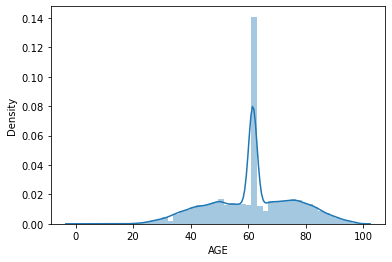

In [376]:
numerical['AGE'] = numerical["AGE"].fillna(np.mean(numerical['AGE']))
sns.distplot(numerical['AGE'])
plt.show()
#probably would be a bit better to use a predictive method here but this works

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


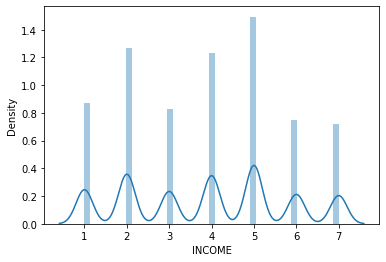

In [377]:
#sns.distplot(numerical['INCOME'])  # this will not work as there are NaNs in the column
sns.distplot(numerical[numerical['INCOME'].isna()==False]['INCOME']) 
plt.show()

In [378]:
# looks like the variable is actually categorical. We can verify it by using value_counts()
print(numerical['INCOME'].value_counts())
numerical['INCOME'] = numerical['INCOME'].astype('object')

5.0    15451
2.0    13114
4.0    12732
1.0     9022
3.0     8558
6.0     7778
7.0     7471
Name: INCOME, dtype: int64


In [379]:
numerical['INCOME'] = numerical['INCOME'].fillna('5.0') # Replacing the null values with the most represented categoty

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


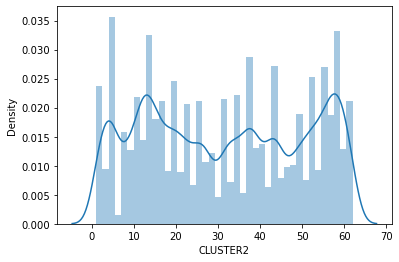

In [380]:
sns.distplot(numerical[numerical['CLUSTER2'].isna()==False]['CLUSTER2']) 
plt.show()

In [381]:
numerical['CLUSTER2'] = numerical['CLUSTER2'].fillna(np.ceil(np.mean(numerical['CLUSTER2'])))

### Activity 2.3

Check if there are any other null values in the numerical data.


Clean the columns WEALTH2 and TIMELAG. Use appropriate method to fill the null values in these columns.

In [382]:
numerical.WEALTH2

0        5.0
1        9.0
2        1.0
3        0.0
4        NaN
        ... 
95407    NaN
95408    NaN
95409    NaN
95410    7.0
95411    8.0
Name: WEALTH2, Length: 95412, dtype: float64

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


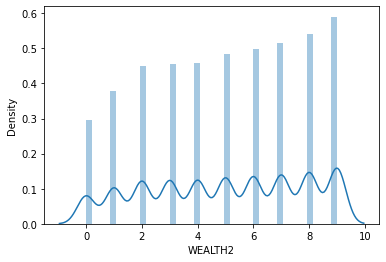

In [383]:
sns.distplot(numerical[numerical['WEALTH2'].isna()==False]['WEALTH2']) 
plt.show()

In [384]:
print(numerical['WEALTH2'].mean())
print(numerical['WEALTH2'].median())

4.954525189478377
5.0


In [385]:
numerical['WEALTH2'] = numerical['WEALTH2'].astype('object')
numerical['WEALTH2'] = numerical['WEALTH2'].fillna('5.0') # median

/Users/mariaesquivel/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


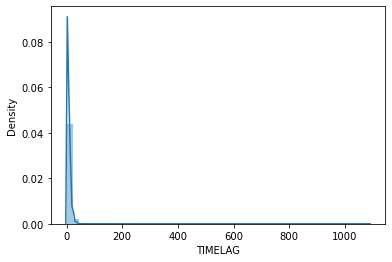

In [386]:
sns.distplot(numerical[numerical['TIMELAG'].isna()==False]['TIMELAG']) 
plt.show()

In [393]:
numerical['TIMELAG'] = numerical['TIMELAG'].fillna(numerical['TIMELAG'].median())

In [394]:
numerical['TIMELAG'].isna().sum()

0

# Lab 2

Instructions


Here we will work on cleaning some of the other columns in the dataset using the techniques that we used before in the lessons.


1. Check for null values in the numerical columns.
2. Use appropriate methods to clean the columns GEOCODE2, WEALTH1, ADI, DMA,and MSA.
3. Use appropriate EDA technique where ever necessary.ADD HERE CODE FOR LAB 2

In [388]:
# First clean NaN for ADI, DMA and MSA
print(numerical['ADI'].value_counts(dropna = False))
print(numerical['DMA'].value_counts(dropna = False))
print(numerical['MSA'].value_counts(dropna = False))



13.0     7296
51.0     4622
65.0     3765
57.0     2836
105.0    2617
         ... 
651.0       1
103.0       1
601.0       1
161.0       1
147.0       1
Name: ADI, Length: 205, dtype: int64
803.0    7296
602.0    4632
807.0    3765
505.0    2839
819.0    2588
         ... 
569.0       1
554.0       1
584.0       1
552.0       1
516.0       1
Name: DMA, Length: 207, dtype: int64
0.0       21333
4480.0     4606
1600.0     4059
2160.0     2586
520.0      1685
          ...  
9140.0        1
3200.0        1
9280.0        1
743.0         1
8480.0        1
Name: MSA, Length: 299, dtype: int64


In [389]:
# Since all three columns have a lot of outliers and too many unique values, I will eplace NaN by median 
numerical['ADI'] = numerical['ADI'].fillna(numerical['ADI'].median())
numerical['DMA'] = numerical['DMA'].fillna(numerical['DMA'].median())
numerical['MSA'] = numerical['MSA'].fillna(numerical['MSA'].median())


print(numerical['ADI'].isna().sum())
print(numerical['DMA'].isna().sum())
print(numerical['MSA'].isna().sum())

0
0
0


In [390]:
# Check NaN in WEALTH1
numerical['WEALTH1'].isna().sum()

44732

In [391]:
# To clean up NaN, I will try to predict values for WEALTH1

In [395]:
# First need to remove all columns with NaN, so that I can build a model
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

column_name  nulls
5       WEALTH1  44732
302     ADATE_3   1950
303     ADATE_4   2191
304     ADATE_6   3557
305     ADATE_7   8874
306     ADATE_8   3511
307     ADATE_9  11245
308    ADATE_11  10422
309    ADATE_12   8923
310    ADATE_14  18867
311    ADATE_16  20364
312    ADATE_18  21263
328    NEXTDATE   9973

In [397]:
print('numerical shape: ',numerical.shape)
numerical2 = numerical.drop(['WEALTH1'],axis=1)
numerical2 = numerical2.dropna(axis = 1)
print('numerical2 shape: ',numerical2.shape)

numerical shape:  (95412, 335)
numerical2 shape:  (95412, 322)


In [398]:
WEALTH1 = numerical['WEALTH1']
numerical2 = pd.concat([numerical2,WEALTH1], axis = 1)
print('numerical2 shape: ',numerical2.shape)

numerical2 shape:  (95412, 323)


In [400]:
# Check NaN in numeric2 df
df2 = pd.DataFrame(numerical2.isna().sum()).reset_index()
df2.columns = ['column_name', 'nulls']
df2[df2['nulls']>0]

column_name  nulls
322     WEALTH1  44732

In [ ]:
# create a subset of the numerical data with only the rows with income DIFFERENT from NaN

In [401]:
numerical2_wealth1 = numerical2[numerical2['WEALTH1'].notna()]
numerical2_wealth1.shape

(50680, 323)

In [402]:
X_wealth1 = numerical2_wealth1.drop(['WEALTH1'],axis=1)
y_wealth1 = numerical2_wealth1['WEALTH1']

In [403]:
# Scale numerical data because variables have different scales
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler


X_normalized_wealth1 = pd.DataFrame(MinMaxScaler().fit_transform(X_wealth1), columns=X_wealth1.columns)
X_normalized_wealth1

ODATEDW     TCODE       DOB       AGE    INCOME       HIT  MALEMILI  \
0      0.727273  0.000017  0.535736  0.463918  0.833333  0.066390  0.000000   
1      0.363636  0.000017  0.000000  0.624862  0.333333  0.008299  0.000000   
2      0.090909  0.000000  0.288465  0.711340  0.000000  0.008299  0.000000   
3      0.000000  0.000000  0.206076  0.793814  0.333333  0.248963  0.010417   
4      0.090909  0.000000  0.618023  0.381443  0.500000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
50675  0.181818  0.000034  0.123687  0.876289  0.500000  0.004149  0.020833   
50676  0.727273  0.000483  0.288465  0.711340  0.833333  0.008299  0.000000   
50677  0.363636  0.000000  0.494645  0.505155  0.833333  0.041494  0.020833   
50678  0.909091  0.000017  0.515036  0.484536  1.000000  0.004149  0.000000   
50679  0.181818  0.000034  0.185479  0.814433  0.666667  0.012448  0.010417   

        MALEVET  VIETVETS  WWIIVETS  LOCALGOV  STATEGOV    FEDGOV   WEALTH2  \
0      0.151515  0.555556  0.111111  0.101695  0.020202  0.016667  1.000000   
1      0.202020  0.292929  0.333333  0.101695  0.080808  0.016667  0.111111   
2      0.232323  0.141414  0.313131  0.050847  0.000000  0.050000  0.000000   
3      0.282828  0.090909  0.535354  0.440678  0.030303  0.033333  0.555556   
4      0.333333  0.363636  0.343434  0.118644  0.010101  0.016667  0.333333   
...         ...       ...       ...       ...       ...       ...       ...   
50675  0.373737  0.363636  0.323232  0.186441  0.010101  0.100000  1.000000   
50676  0.333333  0.333333  0.474747  0.084746  0.141414  0.000000  0.555556   
50677  0.444444  0.262626  0.464646  0.423729  0.090909  0.016667  0.666667   
50678  0.313131  0.434343  0.191919  0.067797  0.010101  0.000000  0.555556   
50679  0.333333  0.222222  0.272727  0.135593  0.101010  0.050000  0.888889   

         POP901    POP902    POP903   POP90C1   POP90C2   POP90C3   POP90C4  \
0      0.036585  0.042488  0.030536  1.000000  0.000000  0.000000  0.543478   
1      0.070931  0.092208  0.081663  0.000000  0.020202  0.989899  0.532609   
2      0.006484  0.007232  0.006701  0.000000  0.080808  0.929293  0.586957   
3      0.025532  0.028340  0.023284  1.000000  0.000000  0.000000  0.500000   
4      0.010810  0.011074  0.010648  0.000000  1.000000  0.000000  0.500000   
...         ...       ...       ...       ...       ...       ...       ...   
50675  0.053657  0.060342  0.060276  1.000000  0.000000  0.000000  0.489130   
50676  0.015430  0.020656  0.022336  1.000000  0.000000  0.000000  0.478261   
50677  0.018581  0.023911  0.019215  0.000000  0.000000  1.000000  0.532609   
50678  0.012705  0.014554  0.011045  0.969697  0.000000  0.040404  0.554348   
50679  0.039868  0.053878  0.041061  1.000000  0.000000  0.000000  0.521739   

        POP90C5      ETH1      ETH2      ETH3      ETH4      ETH5      ETH6  \
0      0.505051  0.676768  0.000000  0.000000  0.313131  0.060606  0.181818   
1      0.515152  0.969697  0.020202  0.000000  0.000000  0.020202  0.000000   
2      0.464646  0.616162  0.000000  0.000000  0.111111  0.323232  0.272727   
3      0.545455  0.020202  0.989899  0.000000  0.000000  0.010101  0.000000   
4      0.545455  1.000000  0.000000  0.000000  0.000000  0.010101  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
50675  0.555556  0.929293  0.050505  0.000000  0.020202  0.141414  0.000000   
50676  0.565657  0.979798  0.030303  0.000000  0.000000  0.020202  0.000000   
50677  0.515152  0.888889  0.080808  0.010204  0.010101  0.030303  0.000000   
50678  0.494949  0.919192  0.030303  0.000000  0.020202  0.060606  0.045455   
50679  0.525253  0.868687  0.121212  0.000000  0.010101  0.010101  0.000000   

           ETH7      ETH8      ETH9     ETH10  ETH11  ETH12     ETH13  \
0      0.029851  0.060606  0.059701  0.424242    0.0    0.0  0.021053   
1      0.000000  0.000000  0.000000  0.000000    0.0    0.0  0.021

In [404]:
# Build the model to predict Wealth1 values
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_normalized_wealth1,y_wealth1)
KNN.score(X_normalized_wealth1,y_wealth1)

0.6762036306235202

In [405]:
predicted_wealth1_test = pd.Series(KNN.predict(X_normalized_wealth1),name='predicted_wealth1_test')

In [406]:
# predict the WEALTH1 from the other features

X_all = numerical2.drop(['WEALTH1'],axis=1)
X_normalized_all = pd.DataFrame(MinMaxScaler().fit_transform(X_all), columns=X_all.columns)
y_all = numerical2['WEALTH1']

In [407]:
# Create a serie to store predictions

predicted_wealth1 = pd.Series(KNN.predict(X_normalized_all),name='predicted_wealth1')

In [409]:
len(predicted_wealth1)

95412

In [408]:
len(numerical)

95412

In [410]:
numerical = pd.concat([numerical,predicted_wealth1],axis=1)

In [412]:
numerical[['WEALTH1','predicted_wealth1']].head(10)

WEALTH1  predicted_wealth1
0      NaN                4.0
1      9.0                9.0
2      1.0                1.0
3      4.0                0.0
4      2.0                2.0
5      NaN                7.0
6      6.0                2.0
7      9.0                7.0
8      2.0                1.0
9      NaN                5.0

In [413]:
# replace the NAN by the predicted values. Original values remain unchanged

numerical['final_wealth1'] =  np.where(numerical['WEALTH1'].isna(), numerical['predicted_wealth1'], numerical['WEALTH1'])
numerical[['WEALTH1','predicted_wealth1','final_wealth1']].head(10)

WEALTH1  predicted_wealth1  final_wealth1
0      NaN                4.0            4.0
1      9.0                9.0            9.0
2      1.0                1.0            1.0
3      4.0                0.0            4.0
4      2.0                2.0            2.0
5      NaN                7.0            7.0
6      6.0                2.0            6.0
7      9.0                7.0            9.0
8      2.0                1.0            2.0
9      NaN                5.0            5.0

In [415]:
numerical.drop(['WEALTH1','predicted_wealth1'],axis=1,inplace=True)
numerical.head()

ODATEDW  TCODE   DOB        AGE INCOME  HIT  MALEMILI  MALEVET  VIETVETS  \
0     8901      0  3712  60.000000    5.0    0         0       39        34   
1     9401      1  5202  46.000000    6.0   16         0       15        55   
2     9001      1     0  61.611649    3.0    2         0       20        29   
3     8701      0  2801  70.000000    1.0    2         0       23        14   
4     8601      0  2001  78.000000    3.0   60         1       28         9   

   WWIIVETS  LOCALGOV  STATEGOV  FEDGOV WEALTH2  POP901  POP902  POP903  \
0        18        10         2       1     5.0     992     264     332   
1        11         6         2       1     9.0    3611     940     998   
2        33         6         8       1     1.0    7001    2040    2669   
3        31         3         0       3     0.0     640     160     219   
4        53        26         3       2     5.0    2520     627     761   

   POP90C1  POP90C2  POP90C3  POP90C4  POP90C5  ETH1  ETH2  ETH3  ETH4  ETH5  \
0        0       35       65       47       53    92     1     0     0    11   
1       99        0        0       50       50    67     0     0    31     6   
2        0        2       98       49       51    96     2     0     0     2   
3        0        8       92       54       46    61     0     0    11    32   
4       99        0        0       46       54     2    98     0     0     1   

   ETH6  ETH7  ETH8  ETH9  ETH10  ETH11  ETH12  ETH13  ETH14  ETH15  ETH16  \
0     0     0     0     0      0      0      0     11      0      0      0   
1     4     2     6     4     14      0      0      2      0      1      4   
2     0     0     0     0      0      0      0      2      0      0      0   
3     6     2     0     0      0      0      0     31      0      0      1   
4     0     0     0     0      0      0      0      0      0      0      0   

   AGE901  AGE902  AGE903  AGE904  AGE905  AGE906  AGE907  CHIL1  CHIL2  \
0      39      48      51      40      50      54      25     31     42   
1      34      41      43      32      42      45      32     33     46   
2      35      43      46      37      45      49      23     35     40   
3      32      40      44      34      43      47      25     45     35   
4      33      45      50      36      46      50      27     34     43   

   CHIL3  AGEC1  AGEC2  AGEC3  AGEC4  AGEC5  AGEC6  AGEC7  CHILC1  CHILC2  \
0     27     11     14     18     17     13     11     15      12      11   
1     21     13     14     33     23     10      4      2      11      16   
2     25     13     20     19     16     13     10      8      15      14   
3     20     15     25     17     17     12      7      7      20      17   
4     23     14     21     13     15     20     12      5      13      15   

   CHILC3  CHILC4  CHILC5  HHAGE1  HHAGE2  HHAGE3  HHN1  HHN2  HHN3  HHN4  \
0      34      25      18      26      10      23    18    33    49    28   
1      36      22      15      12       1       5     4    21    75    55   
2      30      22      19      25      10      23    21    35    44    22   
3      30      14      19      25      11      23    23    27    50    30   
4      34      19      19      31       7      27    16    26    57    36   

   HHN5  HHN6  MARR1  MARR2  MARR3  MARR4  HHP1  HHP2  DW1  DW2  DW3  DW4  \
0    12     4     61      7     12     19   198   276   97   95    2    2   
1    23     9     69      4      3     24   317   360   99   99    0    0   
2     6     2     63      9      9     19   183   254   69   69    1    6   
3    15     8     63      9      6     23   199   283   85   83    3    4   
4    24    14     42     17      9     33   235   323   99   98    0    0   

   DW5  DW6  DW7  DW8  DW9   HV1   HV2  HV3  HV4  HU1  HU2  HU3  HU4  HU5  \
0    0    0    7    7    0   479   635    3    2   86   14   96    4    7   
1    0    0    0    0    0  5468  5218   12   10   96    4   97    3    9   
2    5    3    3    3    0   497   546    2    1   78   

In [416]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

column_name  nulls
301     ADATE_3   1950
302     ADATE_4   2191
303     ADATE_6   3557
304     ADATE_7   8874
305     ADATE_8   3511
306     ADATE_9  11245
307    ADATE_11  10422
308    ADATE_12   8923
309    ADATE_14  18867
310    ADATE_16  20364
311    ADATE_18  21263
327    NEXTDATE   9973

#Wrapping up

In [ ]:
numerical = numerical.drop(columns=drop_list)

In [ ]:
df = pd.DataFrame(numerical.isna().sum()).reset_index()
df.columns = ['column_name', 'nulls']
df[df['nulls']>0]

In [ ]:
numerical.to_csv('numerical7_02.csv')
categorical.to_csv('categorical7_02.csv')

In [ ]:
Y.to_csv('target7_02.csv')

In [ ]:
numerical.to_pickle('numerical7_02.p')
categorical.to_pickle('categorical7_02.p')
Y.to_pickle('target7.02.p')